In [90]:
#Importing required packages.
import numpy as np # linear algebra
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


import os
import warnings

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.5476923076923077,
  0.54,
  0.5758974358974359,
  0.5497435897435897,
  0.6543589743589744,
  0.5861538461538461,
  0.6076923076923076,
  0.3446153846153846]}

In [92]:

wine = pd.read_csv('output.csv')


In [93]:

wine.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_data
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3


In [94]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


In [97]:
selected_features=['residual sugar', 'total sulfur dioxide', 'sulphates',
                   'alcohol', 'volatile acidity', 'quality']
dataset_selected_features=wine[selected_features]

In [98]:
condition1=(dataset_selected_features['quality']==3)|(dataset_selected_features['quality']==4)
condition2=(dataset_selected_features['quality']==5)|(dataset_selected_features['quality']==6)
condition3=(dataset_selected_features['quality']==7)|(dataset_selected_features['quality']==8)
level_34=round(dataset_selected_features[condition1].describe(),2)
level_56=round(dataset_selected_features[condition2].describe(),2)
level_78=round(dataset_selected_features[condition3].describe(),2)

In [99]:
level_all=pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['Levels:3,4','Levels:5,6','Levels:7,8',])
level_all.T

count    mean    std   min    25%     50%  \
Levels:3,4 residual sugar         246.0    4.27   3.94  0.70   1.50    2.20   
           total sulfur dioxide   246.0  105.70  69.44  7.00  50.25  102.00   
           sulphates              246.0    0.51   0.16  0.25   0.40    0.49   
           alcohol                246.0   10.18   1.00  8.00   9.40   10.05   
           volatile acidity       246.0    0.47   0.25  0.11   0.28    0.38   
           quality                246.0    3.88   0.33  3.00   4.00    4.00   
Levels:5,6 residual sugar        4974.0    5.66   4.94  0.60   1.80    3.10   
           total sulfur dioxide  4974.0  117.74  57.86  6.00  76.00  121.00   
           sulphates             4974.0    0.53   0.14  0.23   0.44    0.51   
           alcohol               4974.0   10.27   1.07  8.00   9.40   10.00   
           volatile acidity      4974.0    0.35   0.17  0.08   0.23    0.30   
           quality               4974.0    5.57   0.50  5.00   5.00    6.00   
Levels:7,8 residual sugar        1272.0    4.83   4.07  0.80   1.80    2.90   
           total sulfur dioxide  1272.0  109.87  47.20  7.00  87.00  114.00   
           sulphates             1272.0    0.54   0.16  0.22   0.42    0.51   
           alcohol               1272.0   11.43   1.22  8.50  10.70   11.50   
           volatile acidity      1272.0    0.29   0.12  0.08   0.20    0.27   
           quality               1272.0    7.15   0.36  7.00   7.00    7.00   

                                    75%     max  
Levels:3,4 residual sugar          5.60   17.55  
           total sulfur dioxide  158.50  440.00  
           sulphates               0.57    2.00  
           alcohol                10.90   13.50  
           volatile acidity        0.61    1.58  
           quality                 4.00    4.00  
Levels:5,6 residual sugar          8.50   65.80  
           total sulfur dioxide  160.00  344.00  
           sulphates               0.60    1.98  
           alcohol                11.00   14.90  
           volatile acidity        0.42    1.33  
           quality                 6.00    6.00  
Levels:7,8 residual sugar          6.50   19.25  
           total sulfur dioxide  140.00  289.00  
           sulphates               0.64    1.36  
           alcohol                12.40   14.20  
           volatile acidity        0.34    0.92  
           quality                 7.00    8.00

In [100]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
   
    column_names=dataset.columns.values
  
    number_of_column=len(column_names)
    
   
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

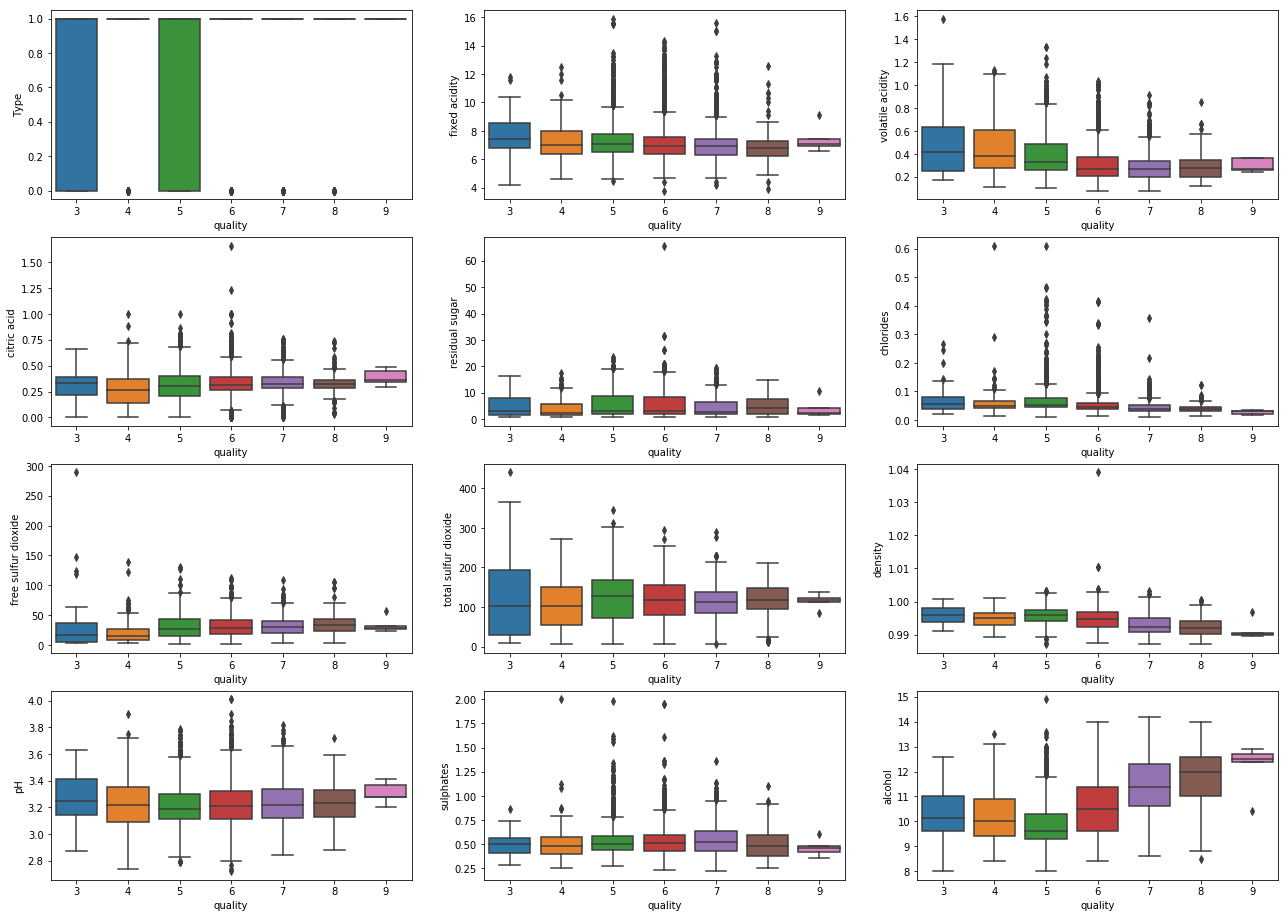

In [101]:
draw_multivarient_plot(wine,4,3,"box")

C:\Users\areej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


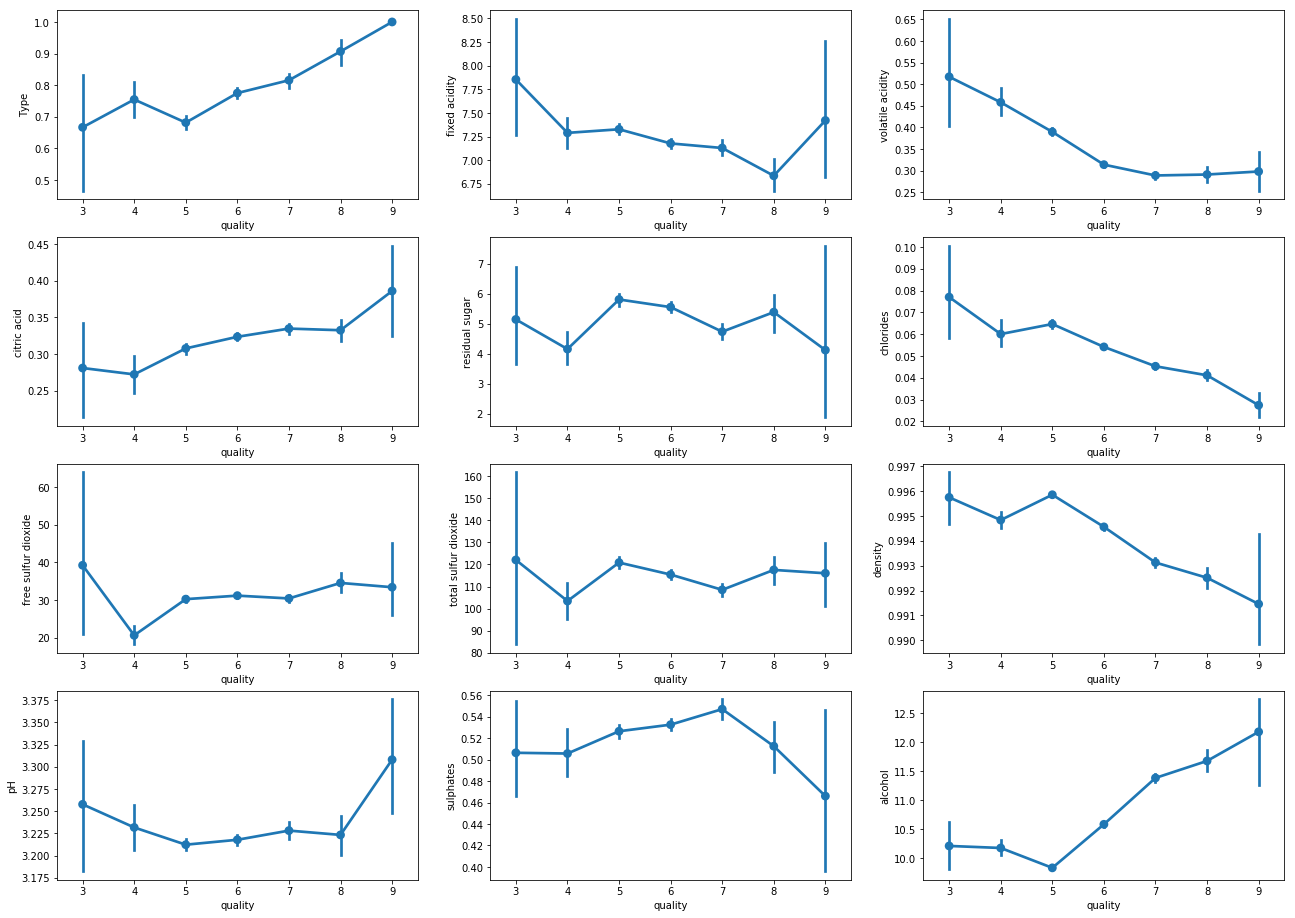

In [102]:
draw_multivarient_plot(wine,4,3,"pointplot")

In [103]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
   
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=KFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
       
   

In [104]:
dataset_temp=wine.copy(deep=True)
X=wine.drop('quality', axis=1)
y=wine['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

C:\Users\areej\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [105]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

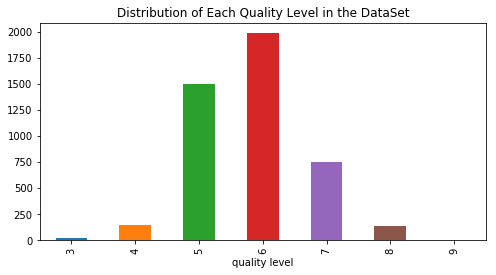

In [106]:
y_frame=pd.DataFrame()
y_frame['quality level']=y_train
y_frame.groupby(['quality level']).size().plot.bar(figsize=(8,4),
                                                     title="Distribution of Each Quality Level in the DataSet")

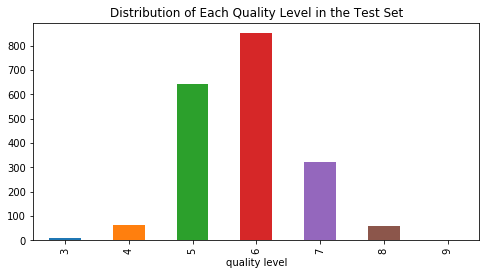

In [107]:
y_frame=pd.DataFrame()
y_frame['quality level']=y_test
y_frame.groupby(['quality level']).size().plot.bar(figsize=(8,4),title="Distribution of Each Quality Level in the Test Set")

SVM

In [118]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

In [119]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.6364102564102564
best params: {'C': 100, 'gamma': 1}
classification reports:
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.46      0.09      0.15        65
          5       0.66      0.66      0.66       642
          6       0.61      0.72      0.66       851
          7       0.69      0.55      0.61       324
          8       0.60      0.31      0.41        58
          9       0.00      0.00      0.00         1

avg / total       0.63      0.64      0.63      1950



C:\Users\areej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
dataset_temp.loc[(dataset_temp['quality']==3),'quality']=1
dataset_temp.loc[(dataset_temp['quality']==4),'quality']=1

dataset_temp.loc[(dataset_temp['quality']==5),'quality']=2
dataset_temp.loc[(dataset_temp['quality']==6),'quality']=2

dataset_temp.loc[(dataset_temp['quality']==7),'quality']=3
dataset_temp.loc[(dataset_temp['quality']==8),'quality']=3

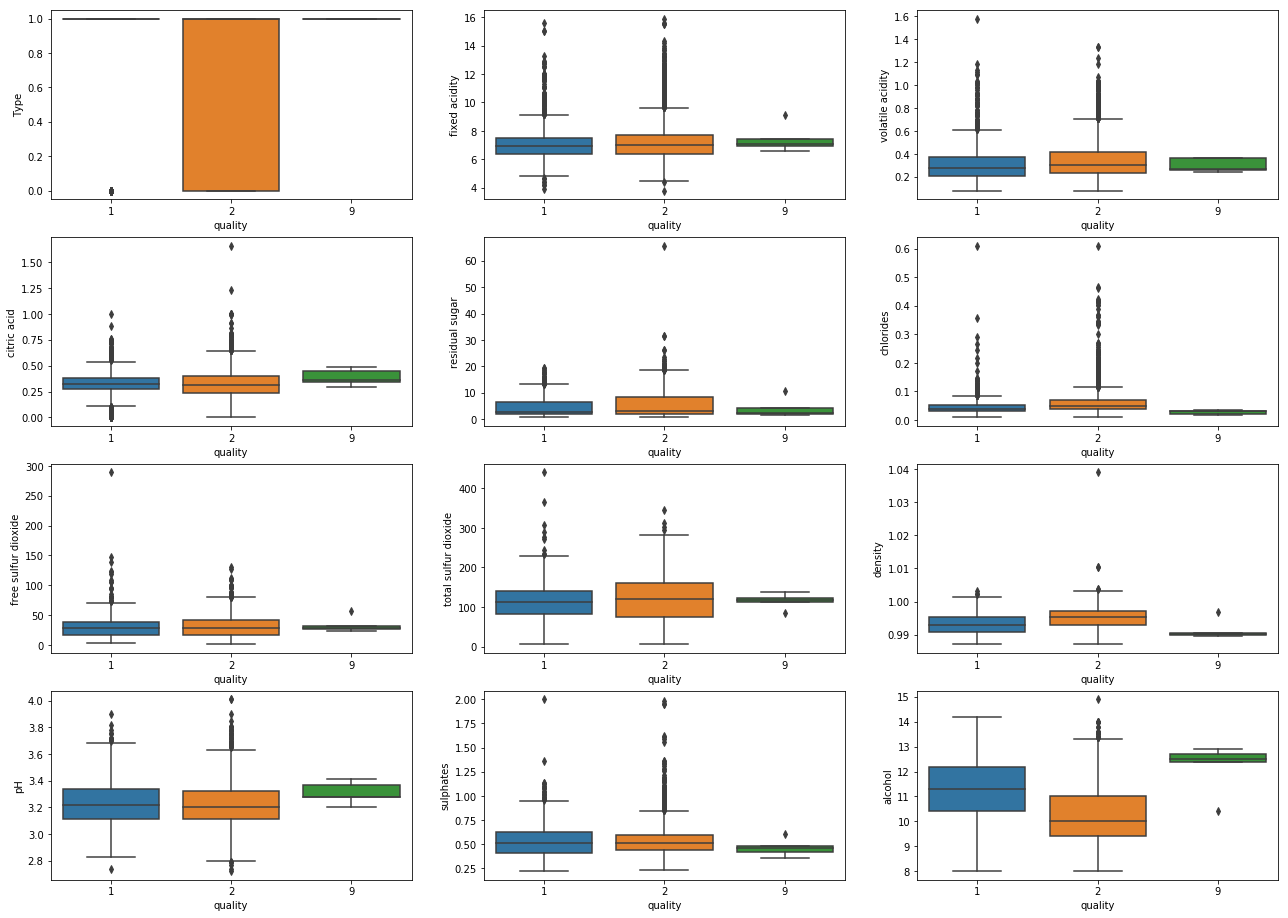

In [121]:
draw_multivarient_plot(dataset_temp,4,3,"box")

C:\Users\areej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


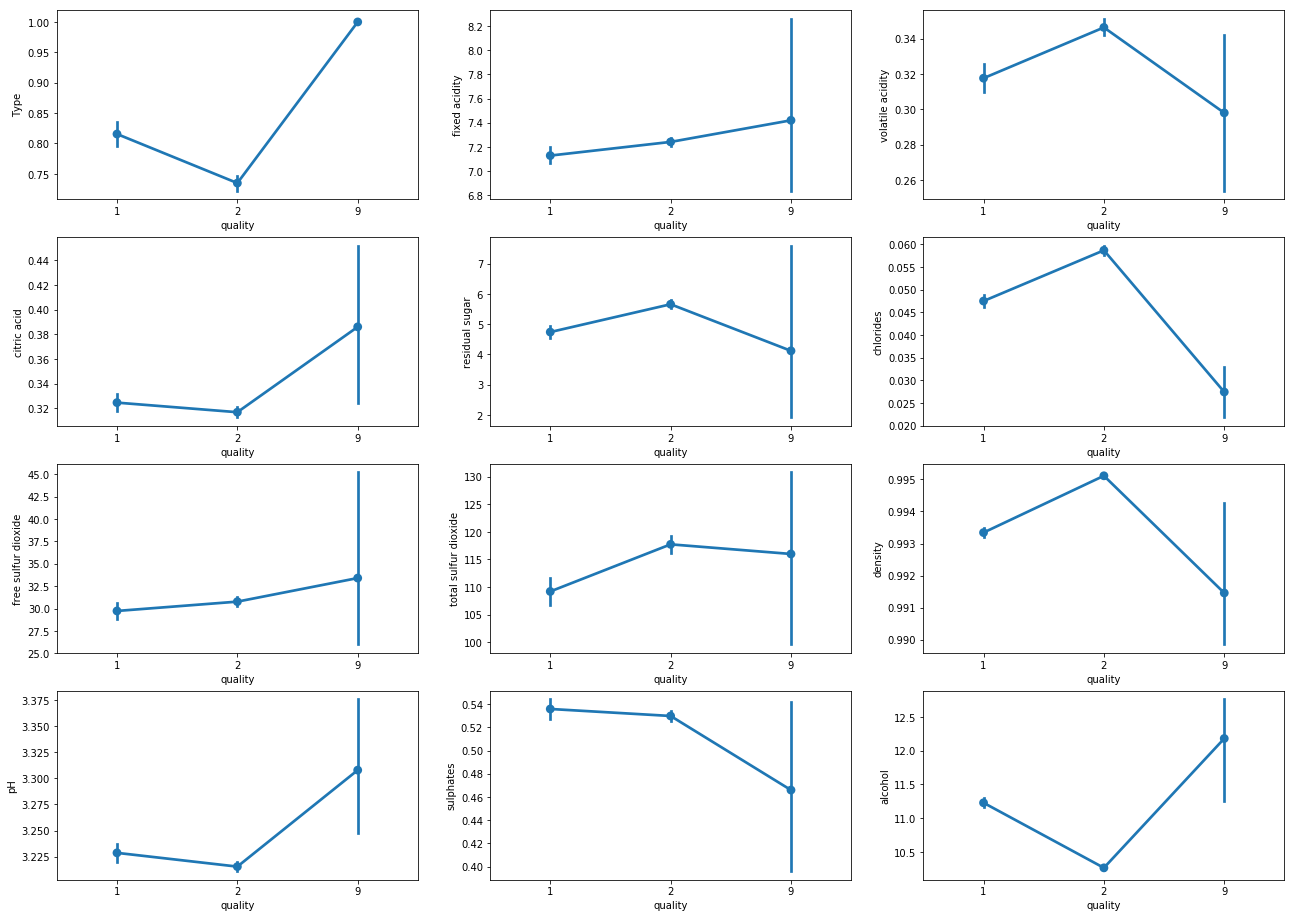

In [122]:
draw_multivarient_plot(dataset_temp,4,3,"point")

SVM

In [123]:
X_temp=dataset_temp.drop('quality', axis=1)
y_temp=dataset_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, 
                                                                      y_temp,
                                                                      stratify=y_temp,
                                                                      test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

In [124]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

best score: 0.8333333333333334
best params: {'C': 1, 'gamma': 1}
classification reports:
              precision    recall  f1-score   support

          1       0.82      0.37      0.51       456
          2       0.84      0.97      0.90      1493
          9       0.00      0.00      0.00         1

avg / total       0.83      0.83      0.81      1950



C:\Users\areej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.64      0.11      0.18        65
          5       0.72      0.75      0.73       642
          6       0.67      0.79      0.72       851
          7       0.74      0.55      0.63       324
          8       0.85      0.29      0.44        58
          9       0.00      0.00      0.00         1

avg / total       0.70      0.70      0.68      1950



C:\Users\areej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

          3       0.33      0.11      0.17         9
          4       0.18      0.06      0.09        65
          5       0.57      0.64      0.60       642
          6       0.56      0.60      0.58       851
          7       0.51      0.44      0.47       324
          8       0.33      0.09      0.14        58
          9       0.00      0.00      0.00         1

avg / total       0.53      0.55      0.54      1950



C:\Users\areej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.575897
1,Random Forest,0.695385
2,KNN,0.549744


As a result, we can see Random Forest model has the best accurary ratio for predicting our wine quality